**OBJECTIVE:**
To make an EDA report and analyse this zomato data

**WORK MAP:**
1. Find out if there are Duplicates value in primary key i.e., res_id, and drop it.
2. Find out the null values and operate them if applicable.
3. Analyse the individual columns and then corelate one column with others.
4. Visualization: By using different graphs make the analyses more effective and easy to understand.
5. Conclude from the observations 

In [57]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [58]:
data= pd.read_csv("../input/zomato-restaurants-in-india/zomato_restaurants_in_India.csv")

In [59]:
data.shape

(211944, 26)

In [60]:
data.drop_duplicates(['res_id'],keep='first', inplace=True)
data.shape

(55568, 26)

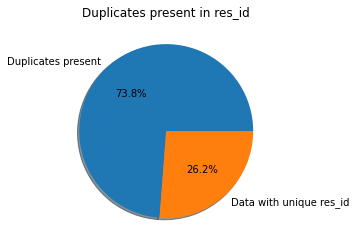

In [61]:
res_id1= np.array([(211944-55568), 55568])
res_id2= ['Duplicates present', 'Data with unique res_id']
plt.pie(res_id1, labels = res_id2, autopct='%1.1f%%', shadow=True)
plt.title("Duplicates present in res_id")
plt.show() 

In original data the total number of rows were 211944, but after removing the duplicate values from res_id, the total count of rows become 55568. This show that the total 73.3% of res_id are present in duplicate manner.
we choose the res_id to remove the duplicate because id should be unique.

In [62]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

The total values of all column should contain 55568 rows value after removing the duplicates values from res_id. There are 18 missing values in address, 44623 in zipcode, 470 in cuisines, 1003 in timings and 12 in opentable_support.

In [63]:
data.count()

res_id                  55568
name                    55568
establishment           55568
url                     55568
address                 55550
city                    55568
city_id                 55568
locality                55568
latitude                55568
longitude               55568
zipcode                 10945
country_id              55568
locality_verbose        55568
cuisines                55098
timings                 54565
average_cost_for_two    55568
price_range             55568
currency                55568
highlights              55568
aggregate_rating        55568
rating_text             55568
votes                   55568
photo_count             55568
opentable_support       55556
delivery                55568
takeaway                55568
dtype: int64

In [64]:
print(data["name"].unique())
print(data["name"].nunique())


['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']
41100


Total 41100 brands are available on zomato across different cities. 

In [65]:
#print(data[data['name']=='# Wednesday'])
data['name'].value_counts()

Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64

Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: name, dtype: int64
Pandit Zayka                             1
Bhukhaa                                  1
Amrit Bhoj                               1
Snacks & Shakes                          1
Ashok Hotel                              1
Boulevard 69                             1
7-Eleven Restaurant                      1
Food station                             1
Silver Saloon - Taj Usha Kiran Palace    1
Geeta lodge                              1
Name: name, dtype: int64
True     36210
False     4890
Name: name, dtype: int64


Text(0.5, 1.0, 'Top 10 outlets on zomato')

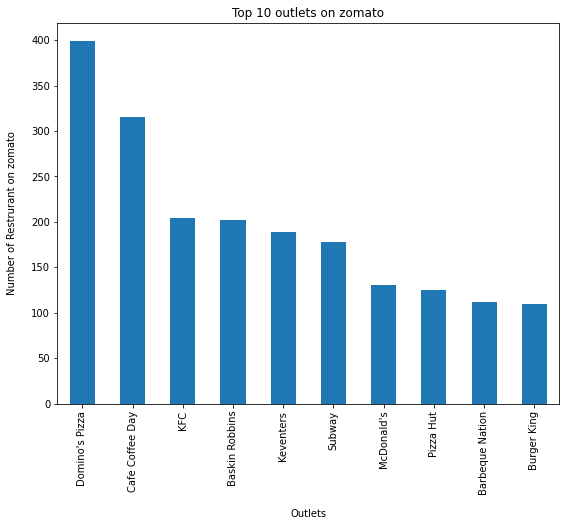

In [66]:
outlet= (data['name'].value_counts()).head(10)
print(outlet)
print((data['name'].value_counts()).tail(10))
print((data['name'].value_counts()==1).value_counts())


outlet.plot(kind='bar', figsize=(9, 7))
plt.xlabel("Outlets", labelpad=14)
plt.ylabel("Number of Restrurant on zomato", labelpad=14)
plt.title("Top 10 outlets on zomato")





The domino's pizza has the maximum number of outlets in India on zomato i.e. 399
the top 10 restaurants available on zomatos are Domino's pizza, cafe coffe day, KFC, Baskin Robbins, Keventers, McDonald's, Pizza hut, Barbeque natio and burger king. the number of outlets of those restaurants are lie in between 399 to 110.

True     36210
False     4890
Name: name, dtype: int64
False    38255
True      2845
Name: name, dtype: int64
False    39055
True      2045
Name: name, dtype: int64


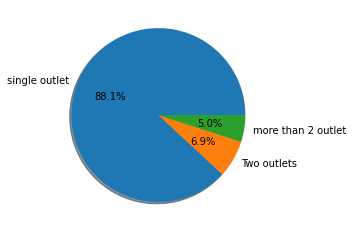

In [67]:
print((data['name'].value_counts()==1).value_counts())
print((data['name'].value_counts()==2).value_counts())
print((data['name'].value_counts()>2).value_counts())

low_outlet= np.array([36210, 2845, 2045])
y1= ['single outlet','Two outlets', 'more than 2 outlet']
plt.pie(low_outlet, labels = y1, autopct='%1.1f%%', shadow=True)
plt.show() 

There are approx 88% single outlet are present in zomato thats means those outlet does not have any branch in orther cities. Approx 7% having two outlets and only 5% have the more than two outlets. 

["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]
27
Domino's Pizza        364
KFC                   186
Subway                162
McDonald's            118
Burger King           100
                     ... 
Hira Sweets             1
Culture Restaurant      1
Barbenese               1
Paul's The Kitchen      1
Red China               1
Name: name, Length: 11161, dtype: int64


Text(0.5, 1.0, 'Top 10 Restrurant having quick bites establishment')

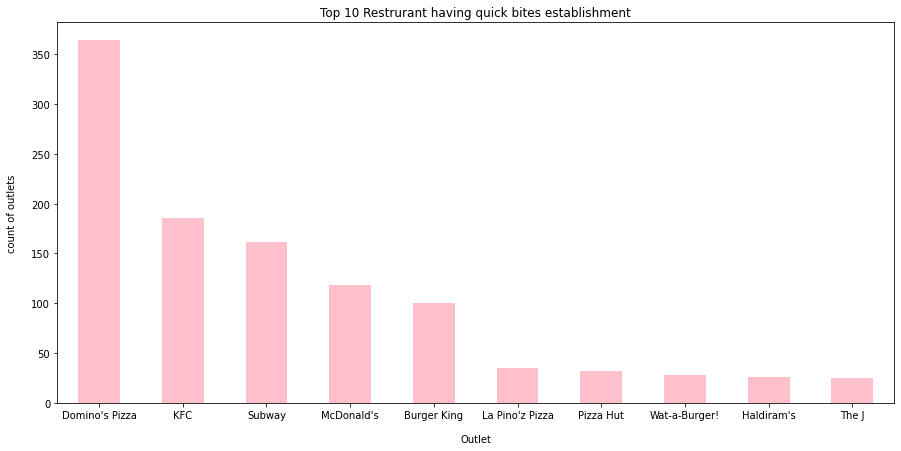

In [68]:
print(data['establishment'].unique())
print(data['establishment'].nunique())
print(((data.loc[data['establishment']=="['Quick Bites']", 'name']).value_counts()))
(((data.loc[data['establishment']=="['Quick Bites']", 'name']).value_counts()).head(10)).plot(kind='bar', figsize=(15, 7), rot=0, color='pink')
plt.xlabel("Outlet", labelpad=14)
plt.ylabel("count of outlets", labelpad=14)
plt.title("Top 10 Restrurant having quick bites establishment")


Domino's pizza has the maximum quick bite establishment on zomato

In [69]:
data['establishment'].value_counts()

['Quick Bites']        14032
['Casual Dining']      12270
['Café']                4123
['Bakery']              3741
['Dessert Parlour']     3675
['Sweet Shop']          2615
['Beverage Shop']       2440
[]                      1830
['Fine Dining']         1535
['Food Court']          1494
['Bar']                 1399
['Dhaba']               1282
['Kiosk']               1126
['Food Truck']           868
['Lounge']               820
['Bhojanalya']           632
['Mess']                 361
['Pub']                  357
['Paan Shop']            320
['Confectionery']        218
['Butcher Shop']         154
['Club']                 112
['Microbrewery']         110
['Shack']                 20
['Cocktail Bar']          16
['Irani Cafe']            14
['Pop up']                 4
Name: establishment, dtype: int64

Text(0.5, 1.0, 'Percentage of different establishment used by restrurants')

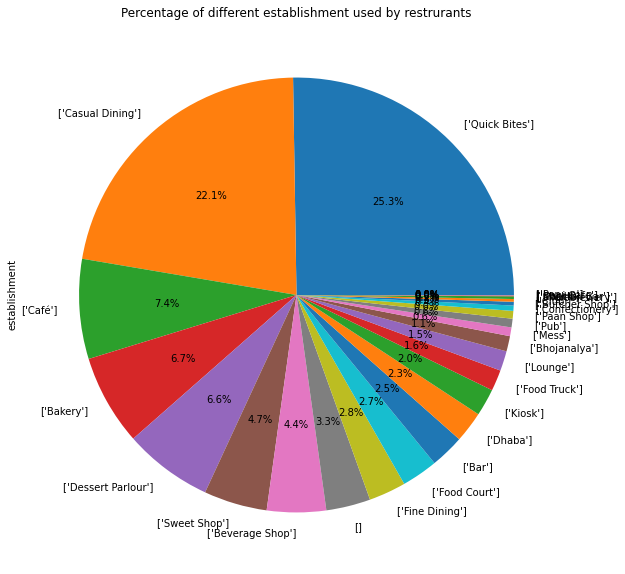

In [70]:
(data['establishment'].value_counts()).plot(kind='pie',autopct='%1.1f%%', figsize=(25,10) )
plt.title("Percentage of different establishment used by restrurants")

Establishment: 27 different types of establishment present in this data. Approx 25% of restrurants have quick bites establishment and only 4 restaurants used pop up establishment. 1830 restaurants i.e. 3.3% do not mention their establishments.

URL: URL is the link to restaurant's page which is not useful for us.

address - Not useful since it has long strings and its difficult to classify


<AxesSubplot:title={'center':'Highly rated establishment'}, xlabel='Establishments', ylabel='Average rating'>

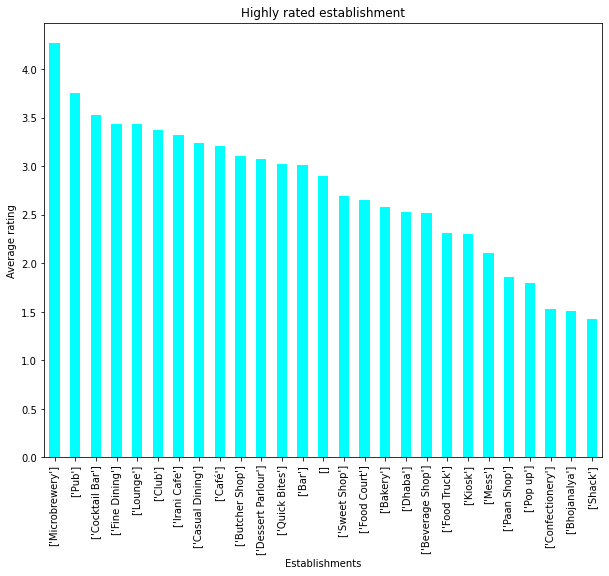

In [71]:
rating_by_est = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending=False)
rating_by_est.plot(kind='bar', color='cyan', figsize=(10,8), title='Highly rated establishment', xlabel='Establishments', ylabel='Average rating')


Microbrewery has the maximum average rating that is 4.2 and shacks establishment has minimum average rating


In [72]:
data["city"].unique()


array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [73]:
len(data["city"].unique())

99

total 99 uniques cities are present.

Bangalore    2247
Mumbai       2022
Pune         1843
Chennai      1827
New Delhi    1704
Jaipur       1395
Kolkata      1361
Ahmedabad    1247
Goa          1150
Lucknow      1135
Name: city, dtype: int64


Text(0.5, 1.0, 'Number of Restrurant available on zomato per city')

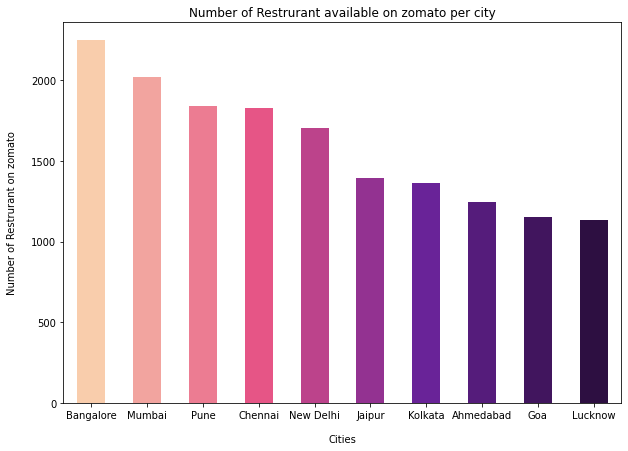

In [74]:
#print(data['city'].value_counts())
print((data['city'].value_counts()).head(10))

((data['city'].value_counts()).head(10)).plot(kind='bar', figsize=(10, 7), rot=0, color= ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]);
plt.xlabel("Cities", labelpad=14)
plt.ylabel("Number of Restrurant on zomato", labelpad=14)
plt.title("Number of Restrurant available on zomato per city")

#print((data['city'].value_counts()).tail(10))

city banglore has the maximum number of different resturants on zomato i.e.2247 and city Nayagaon has 15 resturants on zomato.

city_id - We can uniquely use city name or id. So one feature is enough


In [75]:
print(data["locality"].unique())
print(data["locality"].nunique())
print(data["locality"].value_counts())
#print(min(data["locality"]))

['Khandari' 'Agra Cantt' 'Shahganj' ... 'Navapura' 'L&T Knowledge City'
 'Danteshwar']
3731
Civil Lines                           752
Model Town                            447
Shastri Nagar                         392
Vijay Nagar                           380
Gomti Nagar                           274
                                     ... 
Fairfield by Marriot, Chengalpattu      1
La Woods Hotel, Thousand Lights         1
Hotel Marina Inn, Egmore                1
Hotel Ranjith, Nungambakkam             1
Broad Bean Hotel                        1
Name: locality, Length: 3731, dtype: int64


Locality: 3731 types of locality present in this data

atitude - Can be helpful while using geographic maps, but we won't be doing that here

longitude - Same as above



44623


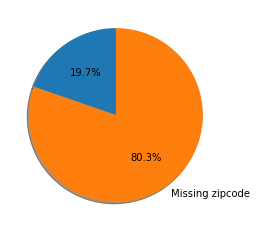

In [76]:
print((data['zipcode']).isnull().sum())

y = np.array([10945, 44623])
mylabels = ["", "Missing zipcode"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show() 

zipcode - Approx 80% missing values

In [77]:
print(data["country_id"].unique())
print(data["country_id"].nunique())


[1]
1


country_id - Since this dataset is for Indian restaurants, thatswhy there are just one unique id here. 

locality_verbose - Same as locality

In [78]:
print(data['cuisines'].unique())
print(data['cuisines'].nunique())

['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']
9382


Total 9382 types of cuisines are mention but 470 of cuisines were blank so first need to fix those null values.
we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes.

In [79]:
data['cuisines']=data['cuisines'].fillna("no cuisines")

Total number of unique cuisines =  134
['North Indian' 'South Indian' 'Mithai' 'Street Food' 'Desserts' 'Mughlai'
 'Rolls' 'Chinese' 'Fast Food' 'Bakery' 'Continental' 'Italian' 'Pizza'
 'Cafe' 'Burger' 'Wraps' 'Beverages' 'Rajasthani' 'Mexican' 'Healthy Food'
 'Sandwich' 'Salad' 'Momos' 'Lebanese' 'Mediterranean' 'Thai' 'Gujarati'
 'Indian' 'Finger Food' 'European' 'Tea' 'Asian' 'Bar Food' 'Kebab' 'Paan'
 'Biryani' 'Juices' 'Ice Cream' 'Japanese' 'Korean' 'Afghan' 'Awadhi'
 'no cuisines' 'Hyderabadi' 'Lucknowi' 'Roast Chicken' 'Drinks Only'
 'Coffee' 'American' 'BBQ' 'Maharashtrian' 'Modern Indian' 'Andhra'
 'Konkan' 'Kerala' 'Sushi' 'Parsi' 'Greek' 'Bengali' 'Seafood'
 'Frozen Yogurt' 'Arabian' 'Indonesian' 'Sindhi' 'Hot dogs' 'Goan'
 'Charcoal Chicken' 'Raw Meats' 'Grill' 'Malwani' 'Cantonese' 'Pakistani'
 'Steak' 'Vietnamese' 'Singaporean' 'Middle Eastern' 'British' 'French'
 'Burmese' 'Kashmiri' 'Mangalorean' 'Malaysian' 'Tex-Mex' 'Spanish'
 'Chettinad' 'Tibetan' 'German' 'Belgian

Text(0.5, 1.0, 'Top 5 cuisines')

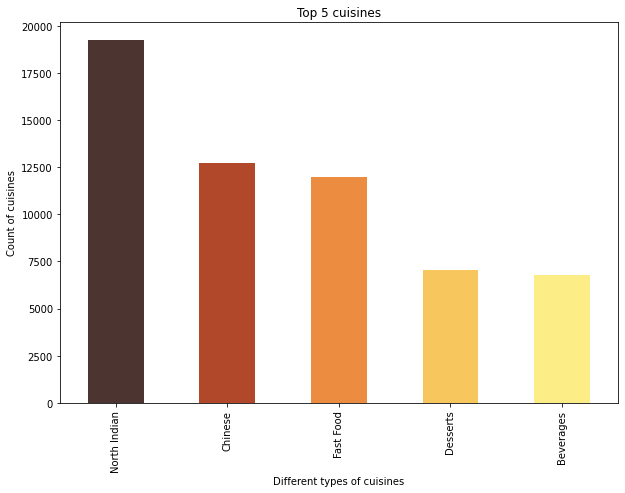

In [80]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())
print(cuisines.unique())
print(cuisines.value_counts())
(cuisines.value_counts()[:5]).plot(kind='bar', figsize=(10,7), color=['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86'])
plt.xlabel("Different types of cuisines")
plt.ylabel("Count of cuisines")
plt.title('Top 5 cuisines')

Mostly outlets (19926) has North Indian cuisines and very less oulets offers Internatinal,vegan, swedish and mandi cuisines.

<AxesSubplot:title={'center':'Top 5 outlet offering North Indian and having maximum chains'}, xlabel="Outlet's name", ylabel='Number of outlets in different cities'>

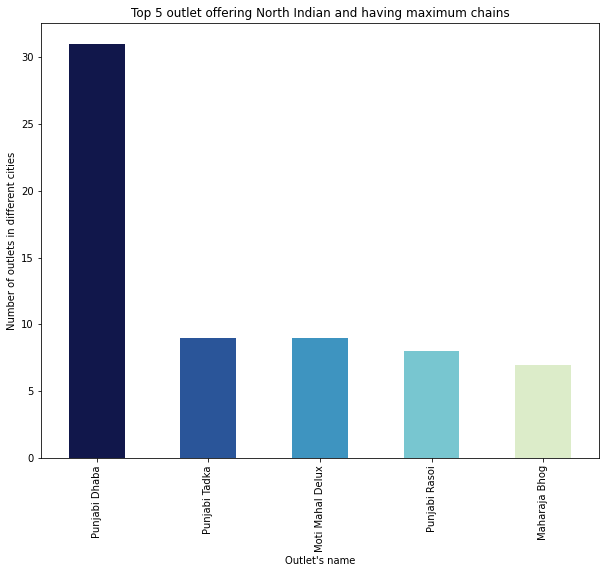

In [81]:
data.loc[data["cuisines"]=='North Indian','name'].value_counts()
(data.loc[data["cuisines"]=='North Indian','name'].value_counts()[:5]).plot(kind='bar', color=['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9'], title='Top 5 outlet offering North Indian and having maximum chains', xlabel="Outlet's name", ylabel='Number of outlets in different cities', figsize=(10,8))

Punjabi dhada have the maximum outlets across the India who offer North Indian cuisine.

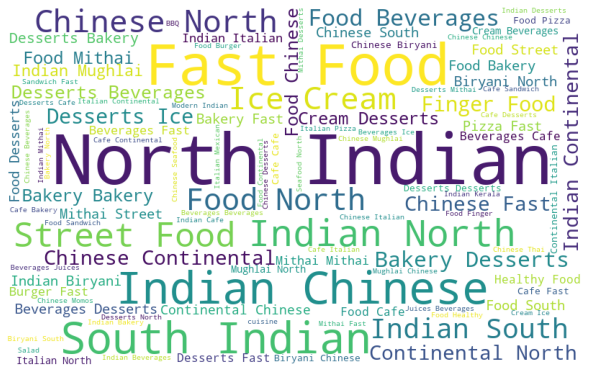

In [82]:
c = ""
for i in cuisines:
    c += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=130).generate(c) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [83]:
print(data["timings"].nunique())
print(data["timings"].unique())
print(data["timings"].value_counts())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']
11 AM to 11 PM                                                    7012
10 AM to 10 PM                                                    1726
11 AM to 10 PM                                                    1429
10 AM to 11 PM                                                    1184
11 AM to 11 PM (Mon-Sun)                                          1021
                                                                  ... 
11am – 10pm (Mon-Thu),11am – 11pm (Fri-Sat),Closed (Sun)             1
Closed (Mon),7PM to 11PM (Tue-Sun)                                   1
7:30 AM to 1 PM, 3 PM to 8:30 PM (Mon-Sun)                           1
10 AM to 3 PM, 6 PM to 1 AM (Mon-Sun)                                1
4pm – 11

This shows the 7740 different timings. although there are some data is missing.

[  700   600   300  1000   400   500  1200  1600   250   200   150  1500
   800   450   850   350   900  6000   650   550  2500  6500  5500  4300
  3600  3500  3200  3000  2800  2000  1800  1400  1300  1250  1150  1100
  1050    50    60   100   750     0   220   260   950  1900  2400  2300
  2200  1700  1230    70   140   120   470    20    40   110    80    90
   440  2100 14000  5000  4500  4100  4000  3700  3400  2700  2600  1650
  1350   180  1260     2   197   312   170   240   330  3100  4200  1850
  3300  4800  3800  3250  2900  1750   282    35   149  1550  5100  6600
  1450   160  2250  8000  7000  3900  3650  1020   320   360   280   130
 15000  2501    30  1950  1875  1190   309 12000   380   299    45   190
  4600   880    75   620   999 10000   505 30000  4050   175   404   445
   640    15   420   115   444   592  1499   208   940   125  7500   520
   294]
145
200    6622
300    6420
400    5220
500    4734
100    4643
       ... 
309       1
380       1
299       1
45  

<AxesSubplot:>

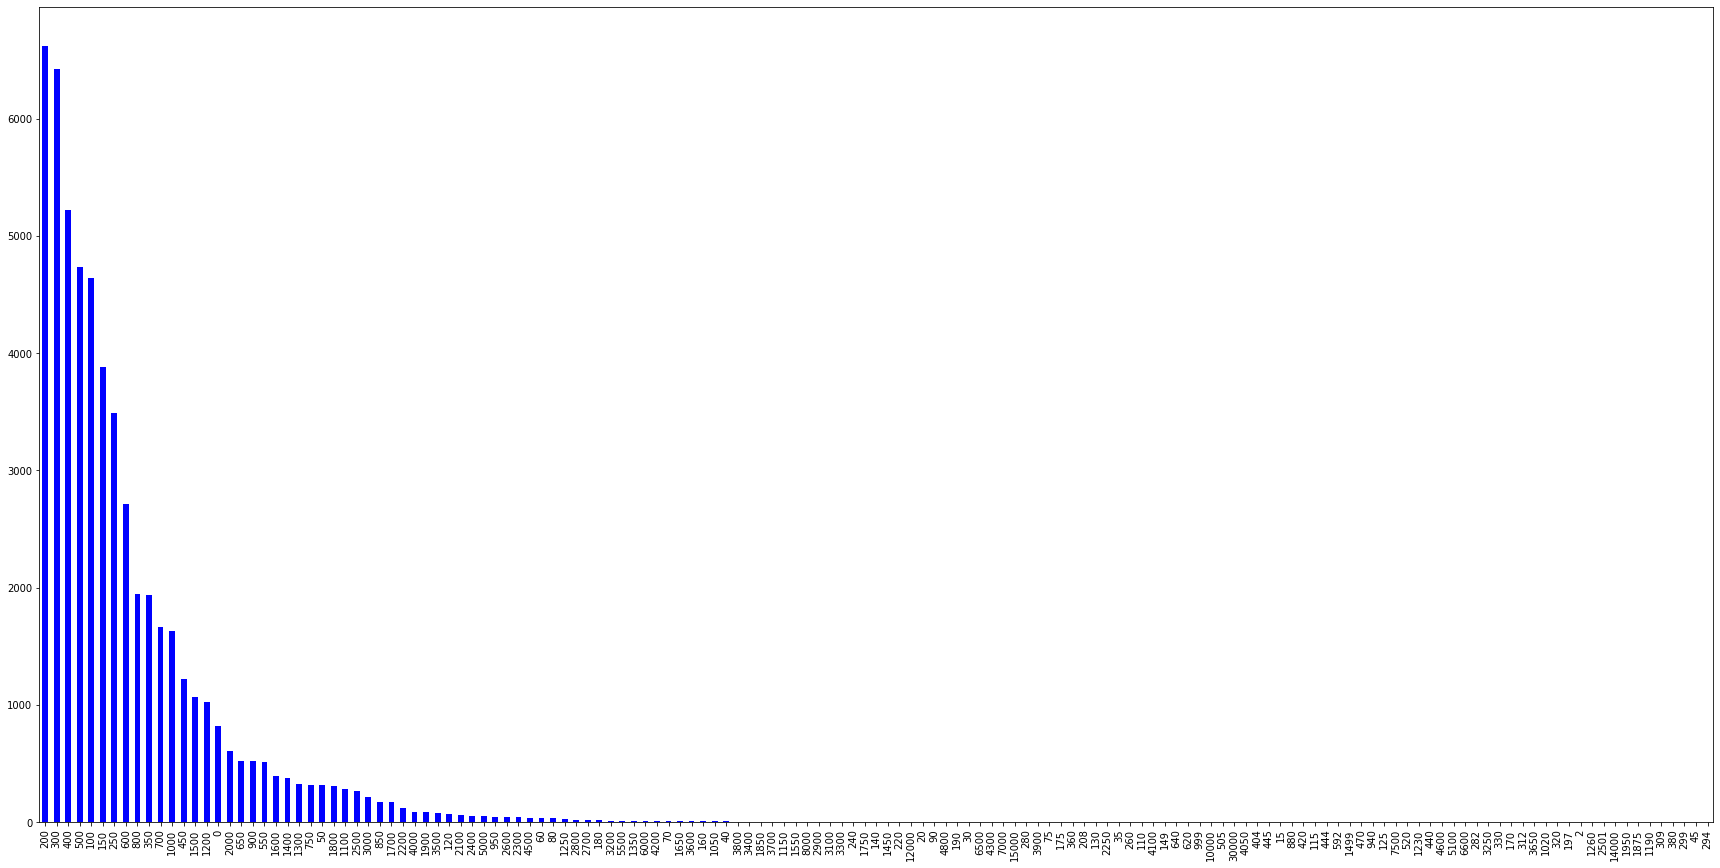

In [84]:
a=data["average_cost_for_two"].unique()
print(a)
print(data["average_cost_for_two"].nunique())
#print(data["average_cost_for_two"])
print(data["average_cost_for_two"].value_counts())
(data["average_cost_for_two"].value_counts()).plot(kind='bar', figsize=(30,15), color='blue')

145 different average cost for two mentioned by different restruants.the cost is range between 30000-0. The maximun cost for two is 30000 and min is 0 which is strange. may be the 0 cost is an outlier. the average of all the average cost for two people is 528.2.
maximum restrurants provide the average cost for two is 200 rs. Maximum oulets offer the budget friendly cost for two which is lies between 200-900

In [85]:
print(sum(data["average_cost_for_two"])/len(data["average_cost_for_two"]))
print(min(data["average_cost_for_two"]))
print(max(data["average_cost_for_two"]))

528.20587388425
0
30000


name
Ocean - The Private Dining Room - Sahara Star    30000.0
Gol Bungalow - Taj Falaknuma Palace              15000.0
Bhairo                                           15000.0
Fly Dining                                       14000.0
Trophy Bar- Umaid Bhawan Palace                  12000.0
Pillars - Umaid Bhawan Palace                    12000.0
Risala- Umaid Bhawan Palace                      12000.0
Wasabi By Morimoto - The Taj Mahal Palace        10000.0
Yuuka - The St. Regis Mumbai                      8000.0
Orient Express - Taj Palace                       8000.0
Name: average_cost_for_two, dtype: float64
136240    Mumbai
Name: city, dtype: object
136240    3.6
Name: aggregate_rating, dtype: float64


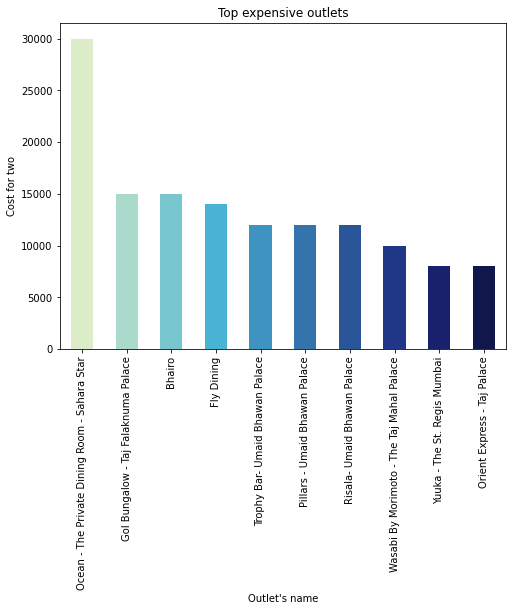

In [86]:
data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False)
print(data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False).head(10))
data.groupby("name").mean()['average_cost_for_two'].sort_values(ascending=False)[:10].plot(kind='bar',title="Top expensive outlets", xlabel="Outlet's name", ylabel='Cost for two', color=['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b'], figsize=(8,6))
print(data.loc[data['name']=='Ocean - The Private Dining Room - Sahara Star','city'])
print(data.loc[data['name']=='Ocean - The Private Dining Room - Sahara Star','aggregate_rating'])



Ocean - The Private Dining Room - Sahara Star located in Mumbai is showing the maximum cost for two i.e., 30000 and having the 3.6 rating.

<AxesSubplot:xlabel='price range'>

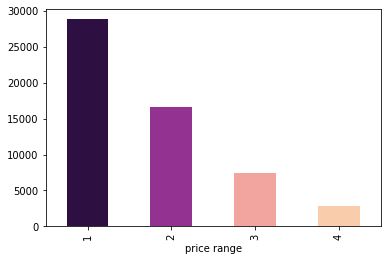

In [87]:
colors=["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
(data["price_range"].value_counts()).plot(kind='bar', color=colors, xlabel='price range')

Maximum outlets have the price range of 1.

city
Goa           2.770435
Varanasi      2.291595
Puducherry    2.223592
Mumbai        2.205737
Dehradun      2.188235
                ...   
Tirupati      1.253394
Kharagpur     1.173469
Jamnagar      1.112245
Amravati      1.089474
Junagadh      1.051546
Name: price_range, Length: 99, dtype: float64


<AxesSubplot:xlabel='city'>

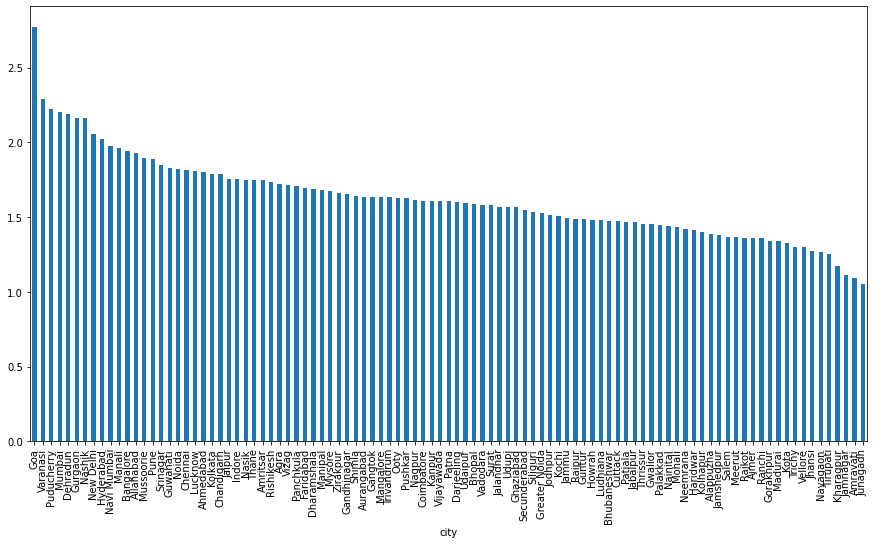

In [88]:
price_name= data.groupby('city').mean()['price_range'].sort_values(ascending=False)
print(price_name)
price_name.plot(kind='bar', figsize=(15,8))

Goa shows the maximum average price range.

price_range
1    2.604473
2    3.218448
3    3.496459
4    3.649107
Name: aggregate_rating, dtype: float64


<AxesSubplot:title={'center':'Average rating v/s Price range'}, xlabel='Price range', ylabel='Average of ratings'>

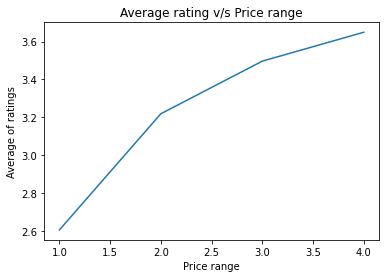

In [89]:
rating_price= data.groupby('price_range').mean()['aggregate_rating'].sort_values(ascending=True)
print(rating_price)
(rating_price).plot(kind='line', xlabel='Price range', ylabel='Average of ratings', title='Average rating v/s Price range')

In [90]:
print(data["price_range"].unique())
print(data["price_range"].nunique())
d1= (data.loc[data['price_range'] == 1, 'average_cost_for_two'])
print("when price_range is 1:",max(d1), min(d1))
d2= data.loc[data['price_range'] == 2, 'average_cost_for_two']
print("when price_range is 2:",max(d2), min(d2))
d3= data.loc[data['price_range'] == 3, 'average_cost_for_two']
print("when price_range is 3:", max(d3), min(d3))
d4= data.loc[data['price_range'] == 4, 'average_cost_for_two']
print("when price_range is 4:", max(d4), min(d4))

             

[2 1 3 4]
4
when price_range is 1: 450 0
when price_range is 2: 999 250
when price_range is 3: 1900 500
when price_range is 4: 30000 1000


when the price range is 1, 2, 3 and 4, it shows that the average cost for two lies between 0 to 450 rs, 250-999, 500-1900 and 1000-30000, respectively. 

price_range
1     216.662156
2     522.320528
3    1091.425916
4    2288.293781
Name: average_cost_for_two, dtype: float64


<AxesSubplot:title={'center':'Price range v/s Average cost for two'}, xlabel='Price range', ylabel='Average cost for two'>

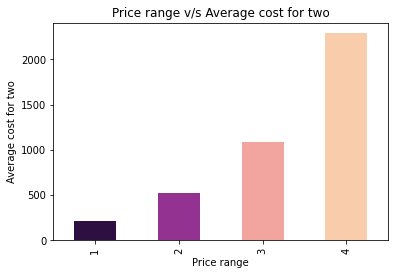

In [91]:
rating_price= data.groupby('price_range').mean()["average_cost_for_two"].sort_values(ascending=True)
print(rating_price)
(rating_price).plot(kind='bar', xlabel='Price range', ylabel='Average cost for two', title='Price range v/s Average cost for two', color=colors)

This is conclude from the above that id the price range is high, so the average cost of two and average rating is also high, its shows the directly proportional relationship. more the price range means more facilities colud be provided and thats why more the cost and good reating is seen there.

In [92]:
data['currency'].unique()

array(['Rs.'], dtype=object)

There are only one type of currency mentioned for the cost i.e. Rs

In [93]:
print(data['highlights'].unique())
print(data['highlights'].nunique())

["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]
31228


highlights - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [94]:
print(data['rating_text'].unique())
print(data['rating_text'].nunique())
print(data['rating_text'].value_counts())


['Very Good' 'Excellent' 'Good' 'Average' 'Not rated' 'Poor'
 'Bardzo dobrze' 'Muito Bom' 'İyi' 'Çok iyi' 'Baik' 'Sangat Baik' 'Skvělé'
 'Muy Bueno' 'Průměr' 'Ortalama' 'Skvělá volba' 'Muito bom' 'Velmi dobré'
 'Excelente' 'Bom' 'Scarso' 'Promedio' 'Vynikajúce' 'Bueno' 'Dobré'
 'Terbaik' 'Harika' 'Veľmi dobré' 'Eccellente' 'Buono' 'Média' 'Dobrze']
33
Average          16313
Good             16019
Very Good        10905
Not rated        10058
Excellent         1609
Poor               575
Sangat Baik          9
Çok iyi              8
Bom                  7
Muito Bom            5
İyi                  5
Baik                 5
Velmi dobré          5
Buono                4
Dobré                4
Promedio             4
Skvělá volba         4
Průměr               4
Excelente            3
Muy Bueno            3
Skvělé               3
Vynikajúce           2
Terbaik              2
Veľmi dobré          2
Bardzo dobrze        2
Muito bom            1
Ortalama             1
Scarso               1
Bu

<AxesSubplot:>

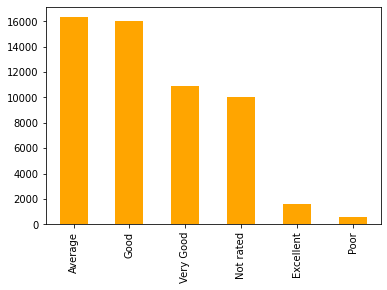

In [95]:
(data['rating_text'].value_counts()[:6]).plot(kind='bar', color='orange')

Very less outlets have the poor rating, mostly fall in average rating

<AxesSubplot:>

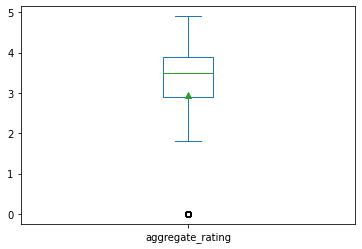

In [96]:
data['aggregate_rating'].sort_values(ascending=False).plot(kind='box', showmeans=True)

4              The Salt Cafe Kitchen & Bar
16                          Pinch Of Spice
22                          Pinch Of Spice
34                  Cafe Turquoise Cottage
36        Tea'se Me - Rooftop Tea Boutique
                        ...               
209393                            Le Privé
209401                         Cafe Fitoor
209572                      Juvenas Bakery
209573                       Infi Pizzeria
209580             Santushti Shakes & More
Name: name, Length: 939, dtype: object
939
Barbeque Nation                 44
AB's - Absolute Barbecues       19
Chili's Grill & Bar              9
Chili's American Grill & Bar     6
Onesta                           5
                                ..
Doodle's Garden                  1
Saladspoint                      1
Fourty Four                      1
Fat Cat Bistro                   1
Santushti Shakes & More          1
Name: name, Length: 766, dtype: int64


Text(0.5, 1.0, 'Top 10 high rated restaurant ')

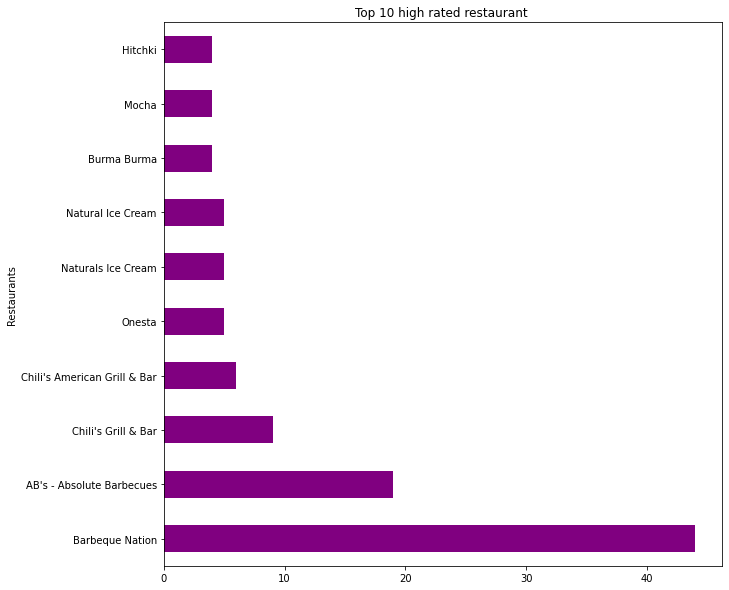

In [97]:
r1= (data.loc[data['aggregate_rating'] > 4.5, 'name'])
print(r1)
print(len(r1))
print(r1.value_counts())
((r1.value_counts()).head(10)).plot(kind='barh', color='purple', figsize=(10,10))
plt.ylabel("Restaurants")
plt.title("Top 10 high rated restaurant ")


Mostly Barbeque nation's outlet have the maximum rating.

0.0    10058
3.9     3537
3.8     3428
3.7     3324
4.0     3307
3.6     3004
3.2     2911
3.4     2789
3.3     2783
3.5     2757
4.1     2757
4.2     2194
3.1     1779
4.3     1612
3.0     1595
2.9     1488
2.8     1156
4.4     1070
2.7      856
4.5      682
2.6      570
4.6      428
2.5      396
2.4      300
4.7      239
2.3      167
4.8      142
4.9      130
2.2       65
2.1       28
2.0       10
1.9        4
1.8        2
Name: aggregate_rating, dtype: int64


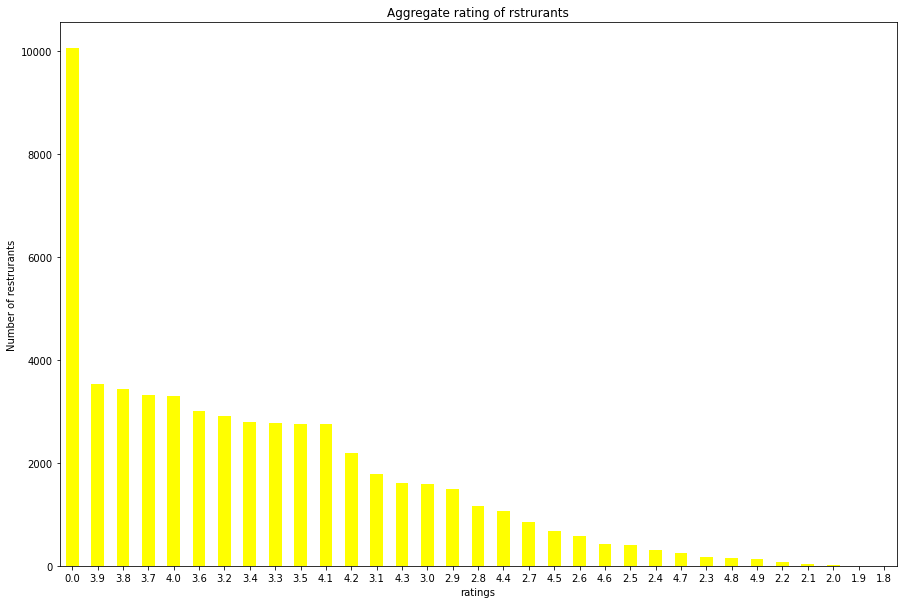

In [98]:
print(data['aggregate_rating'].value_counts())
(data['aggregate_rating'].value_counts()).plot(kind='bar', figsize=(15,10), rot=0, color=['yellow'])
plt.xlabel('ratings')
plt.ylabel('Number of restrurants')
plt.title("Aggregate rating of rstrurants")
plt.show()


In [99]:
data.groupby('name').mean()['aggregate_rating'].sort_values(ascending=False)

name
Plum By Bent Chair                  4.9
Indish Lounge                       4.9
Falani Mastani                      4.9
Pousada By The Beach                4.9
ABB - Andrea's Bar And Brasserie    4.9
                                   ... 
Pawan Chat Stall                    0.0
Pawan Dham Restaurant               0.0
Pawan Fast Food                     0.0
Swasteek Pakoda                     0.0
Kanheiya Chat Bhandar               0.0
Name: aggregate_rating, Length: 41100, dtype: float64

In [100]:
data.groupby('city').mean()['aggregate_rating'].sort_values(ascending=False)

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
                  ...   
Darjeeling      0.961207
Pushkar         0.863190
Kharagpur       0.842857
Palakkad        0.546053
Alappuzha       0.379608
Name: aggregate_rating, Length: 99, dtype: float64

<AxesSubplot:title={'center':'Top rated city per outlet'}, xlabel='City', ylabel='average rating'>

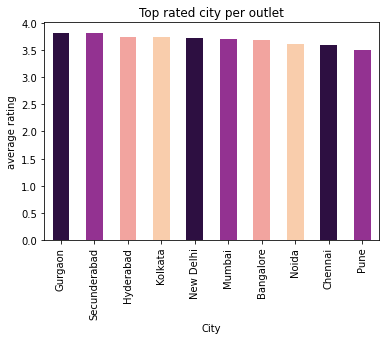

In [101]:
data.groupby('city').mean()['aggregate_rating'].sort_values(ascending=False)[:10].plot(kind='bar', color=colors, title='Top rated city per outlet', xlabel='City', ylabel='average rating')

In [102]:
r2= (data.loc[data['aggregate_rating']<2 , 'rating_text'])
print(r2.value_counts())
#POOR RATING
r2_name= (data.loc[((data['rating_text']=='Poor') & (data['aggregate_rating']<2)), 'name'])
print(r2_name)
#MAX AND MIN RATING
print(data.loc[data['aggregate_rating']==5 , 'rating_text'])
print(max(data['aggregate_rating']))
print(min(data['aggregate_rating']))
print(data["aggregate_rating"].unique())
print(data["aggregate_rating"].nunique())

print(data.loc[data['aggregate_rating']==1.8 , 'name'])
print(data.loc[data['name']=='Alibi - Maya International Hotel' , 'city'])
print(data.loc[data['name']=='Chinese Garden Restaurant' , 'city'])
#AVERAGE RATING
print(sum(data['aggregate_rating'])/len(data['aggregate_rating']))



#print(data.loc[data['rating_text']==''])

Not rated    10058
Poor             6
Name: rating_text, dtype: int64
20030     Alibi - Maya International Hotel
39641                           Kaaraikudi
58228           Khandelwal Tiffin Services
58229                           China Wall
136156                         Club Escape
136540           Chinese Garden Restaurant
Name: name, dtype: object
Series([], Name: rating_text, dtype: object)
4.9
0.0
[4.4 4.2 4.3 4.9 4.  3.8 3.4 4.1 3.5 4.6 3.9 3.6 4.5 4.7 3.7 4.8 3.2 0.
 3.3 2.8 3.1 2.6 3.  2.7 2.9 2.2 2.3 2.4 2.5 2.1 1.8 2.  1.9]
33
20030     Alibi - Maya International Hotel
136540           Chinese Garden Restaurant
Name: name, dtype: object
20030    Bangalore
Name: city, dtype: object
136540    Mumbai
Name: city, dtype: object
2.9585930751511245


None of the restaurant have the 5 rating. The maximum rating had by resturents is 4.9. In total 130 restaurant have this rating.the minimum rating is showed is 0 by it is consider as outlier, 6 restaurant have the rating below 2 which is given as poor in rating text. the lowest rating is 1.8 out of 5, two restaurants have this rating, i.e. alibi-maya international hotel and chinese garden restaurant located in Bangalore and Mumbai, respectively.
2.96 is an average rating of restaurants but maximum restaurants having 3.9 rating and there are lots of restrarant which is not rated.

In [103]:
print(data['votes'].unique())
print(data['votes'].nunique())
print(max(data['votes']))
print(data.loc[data['votes']==42539 , 'name'])
print(data.loc[data['votes']==42539 , 'city'])

print(min(data['votes']))
print(((data['votes'])<1).value_counts())
print(sum(data['votes'])/len(data['votes']))





[ 814 1203  801 ... 2001 1191 1583]
2644
42539
77763    Bawarchi
Name: name, dtype: object
77763    Hyderabad
Name: city, dtype: object
-18
False    50952
True      4616
Name: votes, dtype: int64
223.33035200115174


The Bawarchi restaurant located in Hyderabad has the maximum votes i.e. 42539. the minimum votes is -18 that is totally strange. there are total 4616 restaurants have the negative votes. it might be consider as outliers. the average of the votes is 223.33

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64
city
Palakkad     1.947368
Junagadh     1.427835
Alappuzha    0.815686
Kharagpur    0.469388
Name: votes, dtype: float64


<AxesSubplot:xlabel='city'>

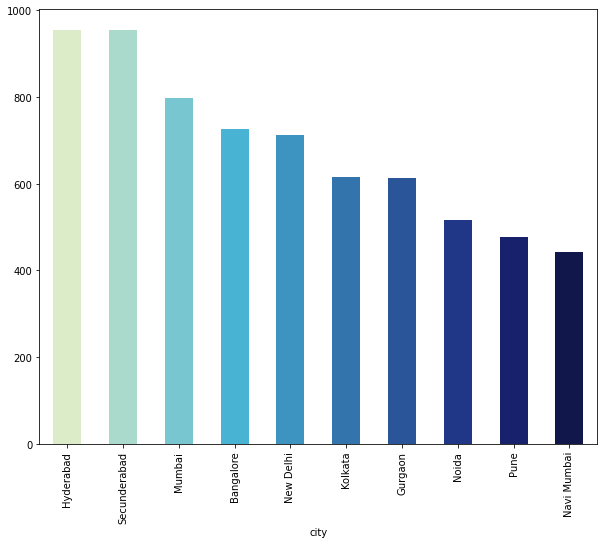

In [104]:
d1=data.groupby('city').mean()['votes'].sort_values(ascending=False)
print(d1.head(10))
print(d1.tail(4))
(data.groupby('city').mean()['votes'].sort_values(ascending=False)[:10]).plot(kind='bar',figsize=(10,8), color=['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b'])




Hyderabad's outlets has the maximum number of votes and Kharagpur has minimum number of votes 


In [105]:
data.groupby('name').mean()['votes'].sort_values(ascending=False)


name
Hauz Khas Social                  14751.0
Byg Brewski Brewing Company       13114.5
Peter Cat                         11856.0
Cafe Bahar                        10953.0
Big Pitcher                       10652.0
                                   ...   
Cake Shop - Vivanta Coimbatore        0.0
Spru's Pizza cafe 1                   0.0
Janata Cafe                           0.0
Parihar Fast Food & Restaurant       -3.0
Vaishno The Cake Makers             -18.0
Name: votes, Length: 41100, dtype: float64

<AxesSubplot:title={'center':'Outlets have maximm votes'}, xlabel='Top 10 Outlets', ylabel='Average votes'>

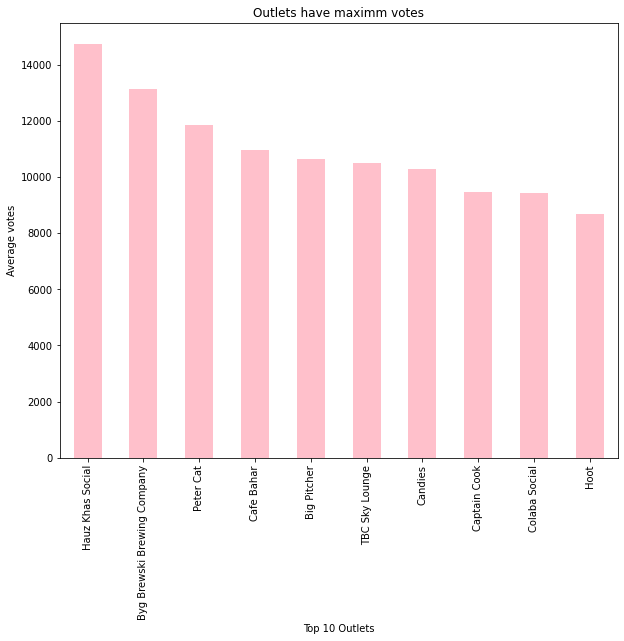

In [106]:
data.groupby('name').mean()['votes'].sort_values(ascending=False)[:10].plot(kind='bar', color='pink', figsize=(10,8), title="Outlets have maximm votes", xlabel='Top 10 Outlets', ylabel='Average votes')

In [107]:
data['photo_count'].value_counts()

0       10519
1        4208
2        2949
3        2278
4        1817
        ...  
1274        1
2100        1
2756        1
3049        1
828         1
Name: photo_count, Length: 2457, dtype: int64

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64
city
Jamnagar     1.048469
Alappuzha    0.866667
Amravati     0.473684
Kharagpur    0.051020
Name: photo_count, dtype: float64


<AxesSubplot:xlabel='city'>

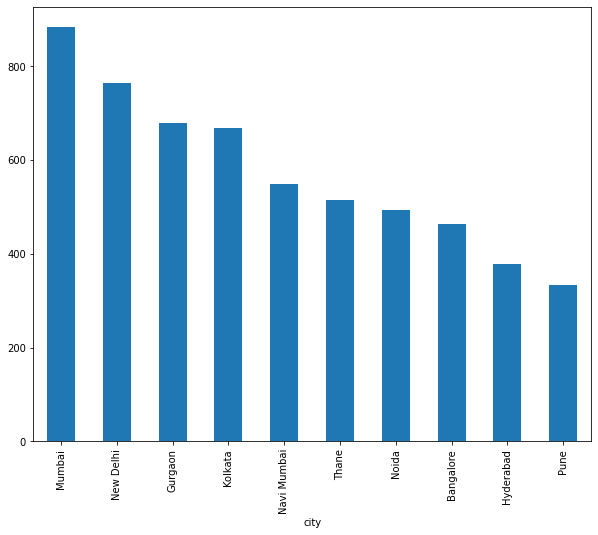

In [108]:
data.groupby('city').mean()['photo_count'].sort_values(ascending=False)
print(data.groupby('city').mean()['photo_count'].sort_values(ascending=False).head(10))
print(data.groupby('city').mean()['photo_count'].sort_values(ascending=False).tail(4))
(data.groupby('city').mean()['photo_count'].sort_values(ascending=False)[:10]).plot(kind='bar',figsize=(10,8))

Mumbai's outlets has the maximum number of photo count and Kharagpur has the minimum photo count.

name
Prankster                        17702.0
38 Barracks                      15545.0
JLWA                             14250.0
Prithvi Cafe                     13763.0
Yeda Republic                    13060.0
                                  ...   
Kadathanad                           0.0
Ravi Ice Cream &Juice Corner         0.0
Ravi's Foods                         0.0
Ravi's Phohoa                        0.0
Dummy Restaurant                     0.0
Name: photo_count, Length: 41100, dtype: float64


<AxesSubplot:title={'center':'Top outlets have maximum photo count'}, xlabel='name'>

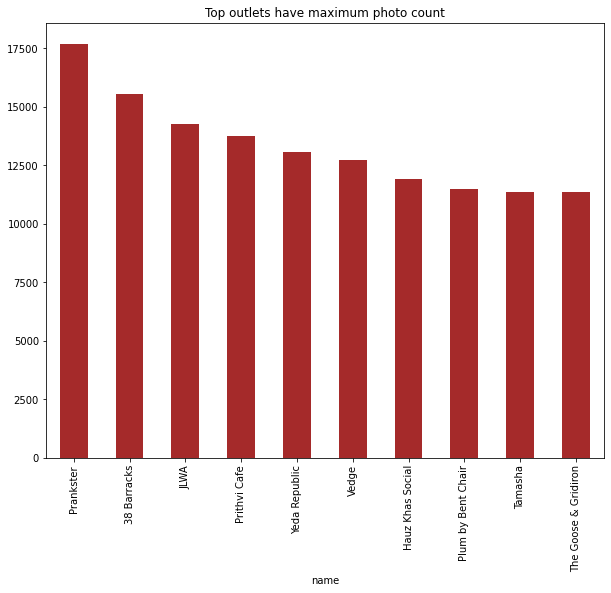

In [109]:
print(data.groupby('name').mean()['photo_count'].sort_values(ascending=False))
data.groupby('name').mean()['photo_count'].sort_values(ascending=False)[:10].plot(kind='bar',title='Top outlets have maximum photo count', figsize=(10,8), color='brown')



**Conclusion**
1. Domino's pizza,cafe coffe day, KFC, Baskin Robbins have the maximum number of outlets in India on zomato. 
2. There are only 5% outlets who have more than 2 chains on zomato.
3. Approx 25% of restaurants have quick bites establishment and Domino's pizza's outlets has maximum quick bite establishment. Microbrewery establishment has the maximum rating.
4. Bangalore has the maximum number of outlets.
5. Mostly outlets has North Indian, chinese and fast food cuisine and very few outlets offers Internatinal,vegan, swedish and mandi cuisines. 
6. Punjabi Dhada has maximum chain which offering North Indian cuisine.
7. The different outlets have different tinings but mostly fall into 10 am to 11 pm.
8. Maximum oulets offer the budget friendly cost of for two which lies between 200-900. Ocean - The Private Dining Room - Sahara Star located in has the maximum cost for two i.e., 30000.
9. The price range is corelated with rating and cost for two. As the cost for two increases, the chance of a restaurant having higher rating and price range increases.
10. Very less outlets have the poor rating, mostly fall in average rating.
11. The rating of mostly outlets lie between 3-4. Barbeque nation' s outlets has the maximum rating.
12. Gurgaon has highest rated restaurants whereas City hyderabad shows the maximum number votes per outlet and Mumbai has the maximum photo count.
13. Hauz khas social has the maximum average votes and the prankster has the maximum photo counts
